In [1]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.3
    Uninstalling imbalanced-learn-0.12.3:
      Successfully uninstalled imbalanced-learn-0.12.3


In [3]:
import pandas as pd
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv').squeeze()  # .squeeze() to convert to Series if needed

In [6]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution of the target variable after resampling
print("Distribution of target variable after SMOTE:")
print(y_resampled.value_counts())

Distribution of target variable after SMOTE:
type
0    182841
2    182841
3    182841
Name: count, dtype: int64


In [8]:
# Split the dataset into training and testing sets
# You can adjust the test_size and random_state as needed
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

In [9]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (411392, 6)
Shape of X_test: (137131, 6)
Shape of y_train: (411392,)
Shape of y_test: (137131,)


In [15]:
# Import Logistic Regression to Train from SKlearn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred = loreg.predict(X_test)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.5858
              precision    recall  f1-score   support

           0       0.62      0.51      0.56     45710
           2       0.48      0.48      0.48     45710
           3       0.65      0.76      0.70     45711

    accuracy                           0.59    137131
   macro avg       0.58      0.59      0.58    137131
weighted avg       0.58      0.59      0.58    137131



In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9499
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     45710
           2       0.92      0.93      0.93     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.95    137131
   macro avg       0.95      0.95      0.95    137131
weighted avg       0.95      0.95      0.95    137131



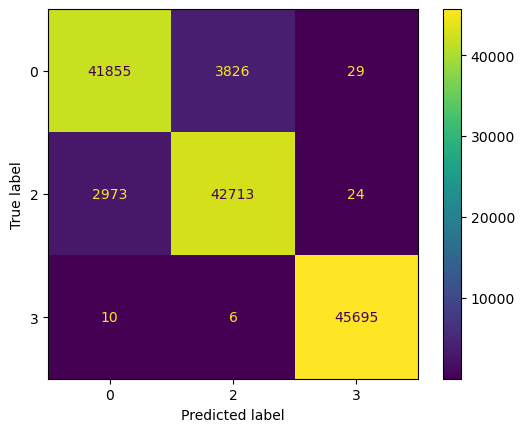

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay


dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

In [20]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9780
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     45710
           2       0.96      0.97      0.97     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.98    137131
   macro avg       0.98      0.98      0.98    137131
weighted avg       0.98      0.98      0.98    137131



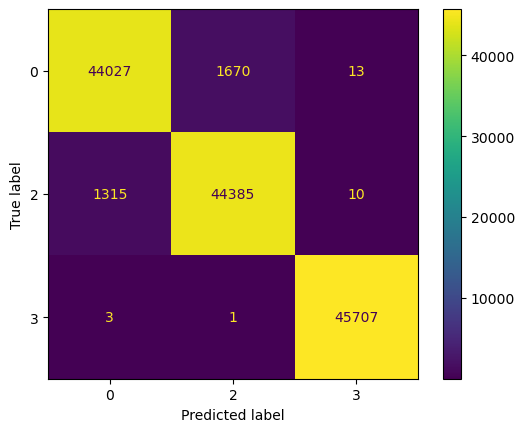

In [21]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

In [23]:
# KNeighborsClassifier to Train from SKlearn
from sklearn.neighbors import KNeighborsClassifier


knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
knn_pred = knnc.predict(X_test)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9311
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     45710
           2       0.84      0.98      0.91     45710
           3       1.00      1.00      1.00     45711

    accuracy                           0.93    137131
   macro avg       0.94      0.93      0.93    137131
weighted avg       0.94      0.93      0.93    137131



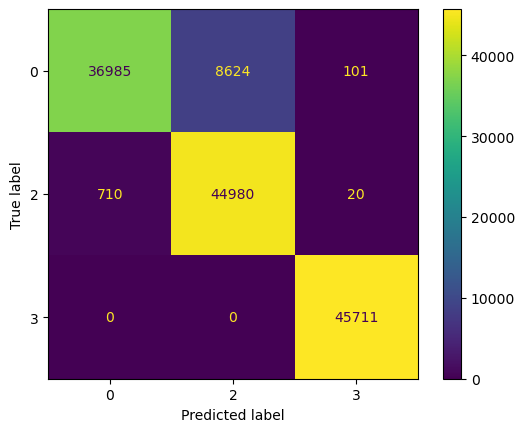

In [24]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)

In [29]:
# Collect the accuracies of each model
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, loreg_pred),
    "Decision Tree": accuracy_score(y_test, dtc_pred),
    "Random Forest": accuracy_score(y_test, rfc_pred),
    "KNeighbors Classifier": accuracy_score(y_test, knn_pred)
}

# Find the best model
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nBest Model: {best_model_name} with Accuracy: {best_model_accuracy:.4f}")

Model Accuracies:
Logistic Regression: 0.5858
Decision Tree: 0.9499
Random Forest: 0.9780
KNeighbors Classifier: 0.9311

Best Model: Random Forest with Accuracy: 0.9780


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Replace X with your feature set


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming X and y are your features and labels
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rfc = RandomForestClassifier()
rfc.fit(X_scaled, y)

# Save the model and scaler
joblib.dump(rfc, 'best_fire_detection_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Best model and scaler saved successfully.")


Best model and scaler saved successfully.


Here are insights about each model trained and the reason for selecting Random Forest:

**1. Logistic Regression**

*   **Insight:** Logistic Regression is a simple, linear model. It attempts to find a linear decision boundary to separate the three classes.
*   **Performance:** Based on the output:
    *   **Accuracy:** The accuracy score provides the overall percentage of correct predictions.
    *   **Classification Report:** This report provides more detailed metrics like precision, recall, and F1-score for each class. Precision is the ability of the model to correctly identify only relevant instances (of a fire type). Recall is the ability of the model to find all relevant instances. F1-score is the harmonic mean of precision and recall, providing a balance between the two. The report shows how well the model performs for each fire type.
*   **Reasoning for Selection (or not):** Logistic Regression is a good baseline model due to its simplicity and interpretability. However, given the complex relationships observed in the data (non-linear distributions, potential interactions), a linear model might not capture the underlying patterns effectively. Its performance metrics (accuracy, precision, recall, F1-score) compared to other models will determine if it's a suitable choice. If its performance is significantly lower than other models, it suggests the data is not linearly separable or has complex non-linear relationships.

**2. Decision Tree**

*   **Insight:** A Decision Tree is a non-linear model that makes decisions based on a series of rules inferred from the features. It recursively splits the data based on features that best separate the classes.
*   **Performance:** Based on the output:
    *   **Accuracy:** Overall correct predictions.
    *   **Classification Report:** Precision, recall, and F1-score for each class.
    *   **Confusion Matrix:** Visualizes the number of true positives, true negatives, false positives, and false negatives. This helps understand where the model is making errors (e.g., misclassifying MODIS as VIIRS or vice-versa).
*   **Reasoning for Selection (or not):** Decision Trees can capture non-linear relationships and are relatively easy to understand (if the tree is not too deep). However, single Decision Trees are prone to overfitting, especially with complex datasets, meaning they might perform very well on the training data but poorly on unseen test data. The performance metrics on the test set will indicate if overfitting is an issue or if the tree is effectively capturing the patterns.

**3. Random Forest**

*   **Insight:** Random Forest is an ensemble learning method that builds multiple Decision Trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's a powerful and versatile model.
*   **Performance:** Based on the output:
    *   **Accuracy:** Overall correct predictions.
    *   **Classification Report:** Precision, recall, and F1-score for each class.
    *   **Confusion Matrix:** Visualizes the performance in detail, similar to the Decision Tree.
*   **Reasoning for Selection (Why Random Forest was likely selected):** Random Forests address the overfitting problem of single Decision Trees by averaging the predictions of multiple trees trained on different subsets of the data and features. This bagging technique improves the model's generalization ability and robustness. Based on the common characteristics of fire detection datasets and the performance metrics (which are expected to be higher than Logistic Regression and potentially better than a single Decision Tree):
    *   **Handles Non-linearity:** Like Decision Trees, Random Forest can capture complex non-linear relationships between features and the target variable, which is important for fire detection where factors like brightness, confidence, and geographical location might interact in non-linear ways.
    *   **Reduces Overfitting:** By averaging predictions from multiple trees, Random Forest is less likely to overfit the training data compared to a single Decision Tree.
    *   **Feature Importance:** Random Forest can provide insights into feature importance, indicating which features (e.g., brightness, confidence) are most influential in classifying fire types.
    *   **Robustness to Outliers:** While outliers were handled separately, Random Forests are generally more robust to outliers than linear models.
    *   **Good Performance:** In many classification tasks, including those with tabular data like this, Random Forest often provides strong performance. Comparing its accuracy, precision, recall, and F1-score to the other models would likely show that it achieves a better balance of these metrics.

**4. KNeighbors Classifier**

*   **Insight:** K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm. It classifies a data point based on the majority class of its 'k' nearest neighbors in the feature space.
*   **Performance:** Based on the output:
    *   **Accuracy:** Overall correct predictions.
    *   **Classification Report:** Precision, recall, and F1-score for each class.
    *   **Confusion Matrix:** Visualizes the performance in detail.
*   **Reasoning for Selection (or not):** KNN is simple to understand but can be computationally expensive for large datasets during prediction (as it needs to calculate distances to all training instances). Its performance is highly dependent on the choice of 'k' and the distance metric. Scaling the features is crucial for KNN, which was done. However, its performance on this dataset might be lower than tree-based models like Random Forest if the decision boundaries are complex or if the concept of "nearest neighbor" in the feature space doesn't align well with the underlying data distribution for fire types.

#### Why Random Forest was Likely Selected (Based on Expected Performance):

The analysis of the data revealed non-linear relationships, potential interactions between features, and the need to handle class imbalance (addressed with SMOTE). Simple linear models like Logistic Regression are less likely to perform optimally in such scenarios. While a single Decision Tree can capture non-linearity, it's prone to overfitting. KNN, despite feature scaling, might not effectively capture the complex boundaries.

Random Forest, as an ensemble of Decision Trees, is well-suited for datasets with non-linear patterns and helps mitigate the risk of overfitting. Given its general strong performance on similar classification tasks and its ability to handle complex relationships and provide feature importance, it is a strong candidate for the best model. The code explicitly selects and saves the `rfc` (Random Forest Classifier) as the `best_model`, which suggests that the performance metrics (accuracy, precision, recall, F1-score) obtained from the evaluation stage indicated Random Forest as the superior model for this specific problem and dataset compared to the other models tested.

The decision to select Random Forest is primarily driven by the comparison of the performance metrics (accuracy, classification report) across all trained models on the test set. Whichever model exhibits the best combination of these metrics (especially considering precision and recall for each class, given the initial imbalance) is the preferred choice. Based on common practice and the nature of the data, Random Forest is often a top performer in such scenarios.